<a href="https://colab.research.google.com/github/kisozipaul/potato-disease-classifcation/blob/main/potato_disease_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

import os
import cv2
from PIL import Image
import numpy as np

import random


In [ ]:
"""
image_directory2 = '/content/drive/MyDrive/pots/PlantVillage/Potato___healthy/'
SIZE = 256
dataset2 = []

my_images = os.listdir(image_directory2)
for i, image_name in enumerate(my_images):
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory2 + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset2.append(np.array(image))

x = np.array(dataset2)


"""

In [ ]:
"""
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir="/content/drive/MyDrive/pots/PlantVillage/healthy_augmented",
                          save_prefix='aug',
                          save_format='png'):
    i += 1
    if i > 1000:
        break

  """

In [2]:


image_directory = '/content/drive/MyDrive/PlantVillage/'
SIZE = 128
dataset = []  # List for storing images
label = []    # List for storing labels

# Load Healthy Images
healthy_images = os.listdir(image_directory + 'healthy2/')
for image_name in healthy_images:
    if os.path.splitext(image_name)[1].lower() == '.png':
        image = cv2.imread(image_directory + 'healthy2/' + image_name)
        if image is not None:
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)  # Healthy label

# Load Early Blight Images
earlyblight_images = os.listdir(image_directory + 'Potato___Early_blight/')
for image_name in earlyblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Potato___Early_blight/' + image_name)
        if image is not None:
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)

# Load Late Blight Images
lateblight_images = os.listdir(image_directory + 'Potato___Late_blight/')
for image_name in lateblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Potato___Late_blight/' + image_name)
        if image is not None:
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(2)  # Late Blight label

# Convert lists to NumPy arrays
dataset = np.array(dataset)
labels = np.array(label)

# Check the shape of the dataset and labels
print("Dataset shape:", dataset.shape)
print("Labels shape:", labels.shape)


Dataset shape: (2998, 128, 128, 3)
Labels shape: (2998,)


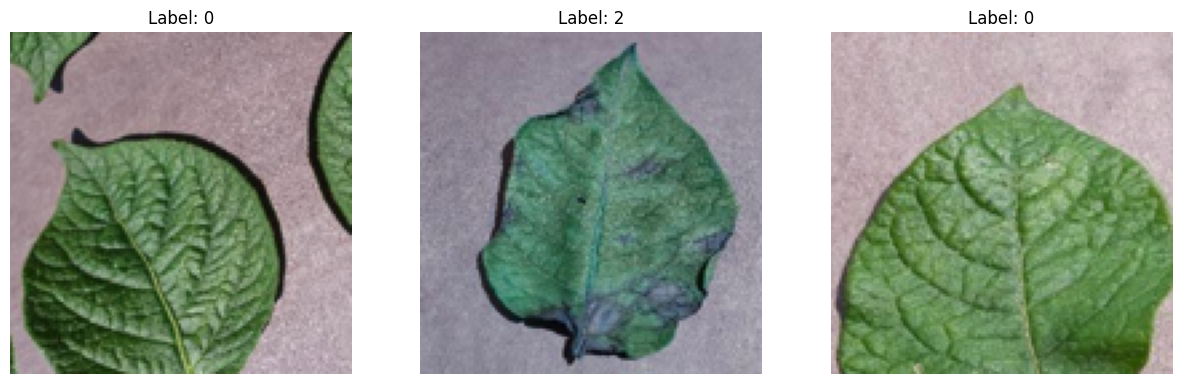

In [3]:


# Set up the figure and the subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Loop to display 3 random images
for i in range(3):
    num = random.randint(0, len(dataset) - 1)

    # Display the image in the corresponding subplot
    axs[i].imshow(np.reshape(dataset[num], (128, 128, 3)))

    # Set the title to show the label for this image
    axs[i].set_title(f"Label: {labels[num]}")

    # Remove the axes ticks for a cleaner look
    axs[i].axis('off')

# Show the plot
plt.show()


label for this image: 1


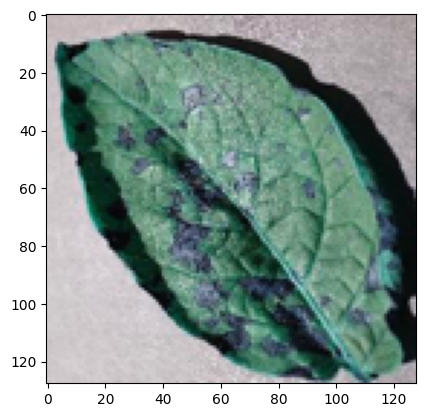

In [4]:
import random
num = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[num],(128,128,3)))
print("label for this image:", label[num])

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.30, random_state = 42)

# Convert y_train and y_test to NumPy arrays
#y_train = np.array(y_train)
#y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

(2098, 128, 128, 3)
(900, 128, 128, 3)


In [6]:
X_train = X_train/255
X_test = X_test/ 255

In [7]:
print(y_train[5])
print(y_train[15])
print(y_train[7])
print(y_train[55])

1
0
2
2


In [8]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [9]:
print(y_train_cat[5])
print(y_train_cat[15])
print(y_train_cat[7])
print(y_train_cat[55])

[0. 1. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]


In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [11]:
#using VGG16
# Step 1: Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Step 2: Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Step 3: Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Adjust for the number of classes

# Step 4: Create the complete model
model2 = Model(inputs=base_model.input, outputs=predictions)
model2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,812,867 (64.14 MB)

 Trainable params: 2,098,179 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model2.fit(X_train, y_train_cat, batch_size=32, verbose=2, epochs=50, validation_data=(X_test, y_test_cat), shuffle=False)


Epoch 1/50
66/66 - 20s - 307ms/step - accuracy: 0.8661 - loss: 0.3795 - val_accuracy: 0.9600 - val_loss: 0.1600
Epoch 2/50
66/66 - 5s - 76ms/step - accuracy: 0.9747 - loss: 0.1143 - val_accuracy: 0.9733 - val_loss: 0.1060
Epoch 3/50
66/66 - 4s - 57ms/step - accuracy: 0.9838 - loss: 0.0751 - val_accuracy: 0.9744 - val_loss: 0.0885
Epoch 4/50
66/66 - 4s - 55ms/step - accuracy: 0.9905 - loss: 0.0526 - val_accuracy: 0.9744 - val_loss: 0.0820
Epoch 5/50
66/66 - 5s - 83ms/step - accuracy: 0.9938 - loss: 0.0393 - val_accuracy: 0.9778 - val_loss: 0.0749
Epoch 6/50
66/66 - 4s - 57ms/step - accuracy: 0.9971 - loss: 0.0307 - val_accuracy: 0.9811 - val_loss: 0.0661
Epoch 7/50
66/66 - 5s - 79ms/step - accuracy: 0.9981 - loss: 0.0249 - val_accuracy: 0.9822 - val_loss: 0.0586
Epoch 8/50
66/66 - 4s - 57ms/step - accuracy: 0.9981 - loss: 0.0206 - val_accuracy: 0.9800 - val_loss: 0.0551
Epoch 9/50
66/66 - 4s - 56ms/step - accuracy: 0.9995 - loss: 0.0173 - val_accuracy: 0.9811 - val_loss: 0.0548
Epoch 10

In [14]:
epochs = range(1, len(history.history['accuracy']) + 1)


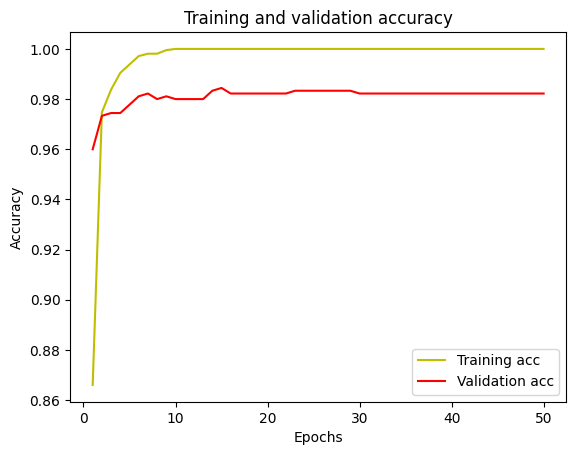

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

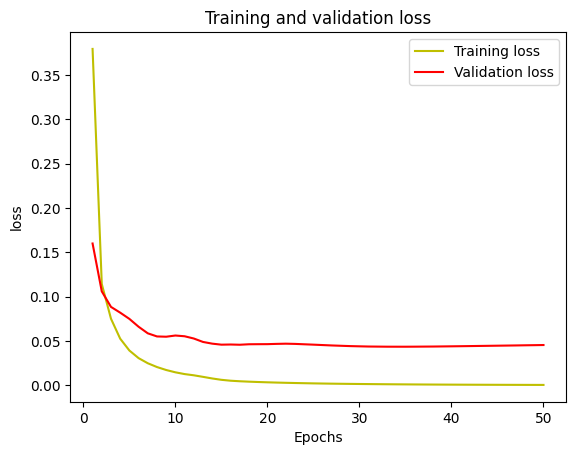

In [17]:
acc = history.history['loss']
val_acc = history.history['val_loss']
plt.plot(epochs, acc, 'y', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have already defined your model and X_test, y_test

# Step 1: Make predictions on the test set
y_pred_probs = model2.predict(X_test)

# Step 2: Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Use y_test directly if it's a 1D array of class labels
y_true = y_test  # Directly assign if y_test is 1D

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Step 5: Generate a classification report
report = classification_report(y_true, y_pred, target_names=['Healthy', 'Early Blight', 'Late Blight'])

# Output results
print("Accuracy: ", accuracy)
print("\nClassification Report:\n", report)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
Accuracy:  0.9822222222222222

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.99      0.98      0.99       310
Early Blight       0.98      0.98      0.98       293
 Late Blight       0.97      0.98      0.98       297

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900

